# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


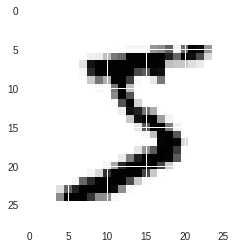

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [10]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
# model.add(Convolution2D(32, (3,3), activation='relu'))
# model.add(Convolution2D(64, (3,3), activation='relu'))
model.add(Convolution2D(10, (1,1), activation='relu'))
model.add(Dropout(0.25))
# model.add(Convolution2D(10, (10, 10)))
# model.add(Convolution2D(10, (1,1)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 10)        650       
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 10)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1440)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               184448    
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='Adam',
             metrics=['accuracy'])

In [13]:
model.fit(X_train, Y_train, batch_size=128, epochs=12, verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/12
60000/60000 [==============================] - 9s 151us/step - loss: 0.3359 - acc: 0.8944
Epoch 2/12
60000/60000 [==============================] - 7s 120us/step - loss: 0.1209 - acc: 0.9638
Epoch 3/12
60000/60000 [==============================] - 7s 121us/step - loss: 0.0921 - acc: 0.9723
Epoch 4/12
60000/60000 [==============================] - 7s 121us/step - loss: 0.0748 - acc: 0.9774
Epoch 5/12
60000/60000 [==============================] - 7s 121us/step - loss: 0.0675 - acc: 0.9785
Epoch 6/12
60000/60000 [==============================] - 7s 122us/step - loss: 0.0581 - acc: 0.9823
Epoch 7/12
60000/60000 [==============================] - 8s 126us/step - loss: 0.0544 - acc: 0.9834
Epoch 8/12
60000/60000 [==============================] - 7s 123us/step - loss: 0.0487 - acc: 0.9849
Epoch 9/12
60000/60000 [==============================] - 7s 121us/step - loss: 0.0462 - acc: 0.9856
Epoch 10/12
60000/60000 [==================

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [15]:
print(score)

[0.021806159618529636, 0.993]


In [0]:
y_pred = model.predict(X_test)

In [17]:
print(y_pred[:9])
print(y_test[:9])

[[4.6356646e-14 6.7601306e-13 1.9116776e-12 8.5921784e-11 9.6163512e-17
  4.3288644e-15 1.2308346e-20 1.0000000e+00 1.3057884e-16 2.6263272e-10]
 [4.3232009e-09 9.4431840e-10 1.0000000e+00 1.1019043e-12 2.1769164e-13
  7.3692353e-16 1.1684488e-09 3.2443384e-13 2.9952347e-12 5.5724082e-14]
 [5.7262029e-12 9.9999881e-01 1.1922051e-08 3.5349057e-11 4.7387965e-07
  2.7069922e-09 1.4248735e-07 3.7128865e-07 2.0349692e-07 2.0847980e-10]
 [9.9991822e-01 5.3348232e-11 1.1275101e-07 3.1552233e-08 2.4707409e-08
  1.2379344e-07 7.8367717e-05 1.6607840e-08 3.0347726e-07 2.8002935e-06]
 [2.2075881e-12 1.5161770e-10 3.2137715e-10 7.9878812e-14 9.9999845e-01
  4.1137428e-12 4.0678197e-11 4.7291785e-11 1.0087100e-09 1.5561550e-06]
 [1.8342320e-12 9.9999964e-01 1.6725403e-10 1.0219384e-12 1.7787747e-07
  2.6857785e-10 8.7631866e-09 1.6713294e-07 7.7722140e-09 7.4544544e-11]
 [9.3749266e-09 7.6379702e-06 2.3607313e-07 6.0440017e-09 8.1260246e-01
  1.1985988e-05 2.5008533e-06 1.2786759e-04 1.8536206e-01 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [19]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored